In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sys

In [2]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [3]:
import import_ipynb
import AdjacencyList as adja

importing Jupyter notebook from AdjacencyList.ipynb


In [4]:
adj = adja.generateAdjacencyList()

In [5]:
import import_ipynb
import player as p

importing Jupyter notebook from player.ipynb
importing Jupyter notebook from convert.ipynb
importing Jupyter notebook from nodeDelete.ipynb


In [6]:
import import_ipynb
import wall as w

importing Jupyter notebook from wall.ipynb


In [7]:
import import_ipynb
import dfs as dfspath
import bfs as bfspath

importing Jupyter notebook from dfs.ipynb
importing Jupyter notebook from bfs.ipynb


In [8]:
import import_ipynb
import nodeDelete as nd

In [9]:
class Game:
    def __init__(self, nop):
        self.nop = nop

    #Note, character goes by 2 spaces, because one space is for the walls
    def drawQuoridorBoard(self):
        bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
        #total of 17x17 board
        bo += 0.8 #opactiy of black spaces
        bo[ ::2, ::2] = 1
        bo[0::2, 0::2] = 1
        
        fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
        ax.imshow(bo, interpolation='nearest')

        #add players:
        Game.addPlayers(self.nop)

        Game.drawPlayers(ax)

        #add walls:
        w.addWalls(self.nop)
        w.drawWalls(ax)

        ax.set(xticks=[], yticks=[])
        ax.axis('image')

        plt.show()
        
    def game(self):
        bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
        #total of 17x17 board
        bo += 0.8 #opactiy of black spaces
        bo[ ::2, ::2] = 1
        bo[0::2, 0::2] = 1

        fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
        ax.imshow(bo, interpolation='nearest')

        #since the game already started, you just draw the players
        Game.drawPlayers(ax)

        #just draw the walls
        w.drawWalls(ax)

        #checks if a player reached the opposite side
        gameover = self.checkWinner()

        ax.set(xticks=[], yticks=[])
        ax.axis('image')

        plt.show()
        return gameover

    def checkWinner(self):
        finish_line = [16,0,16,0]
        for pl in p.players:
            i = pl.id - 1
            if (pl.id <= 2):
                if(pl.x == finish_line[i]):
                    print("GAME OVER")
                    print("Player", pl.id, "wins")
                    return True
            else:
                if(pl.y == finish_line[i]):
                    print("GAME OVER")
                    print("Player", pl.id, "wins")
                    return True
        return False

    def addPlayers(nop):
        initState = [[0, 8, 'royalblue'], [16,8,'limegreen'], 
                 [8, 0, 'gold'],     [8, 16, 'deeppink']]
        
        for i in range(nop):
            pl = p.Player(initState[i][0], initState[i][1], initState[i][2], i+1)
            p.players.append(pl)

    def drawPlayers(ax):
        for pl in p.players:
            ax.text(pl.x, pl.y, u'\u265F', size=30, 
            ha='center', va='center', color=pl.color)

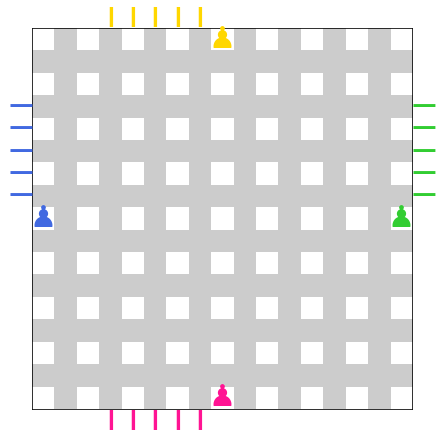

The player 2 Should take the path: [44, 35, 26, 17, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Player:  2 moved using the path


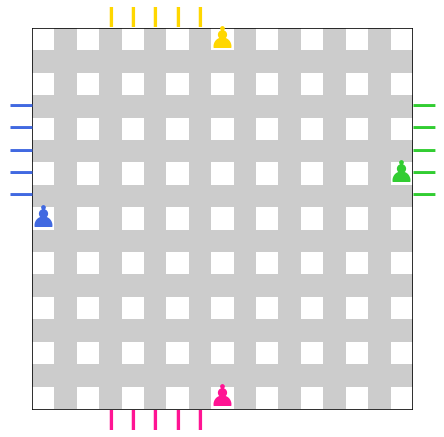

horizontal connection
Player 2 has: 4 walls left


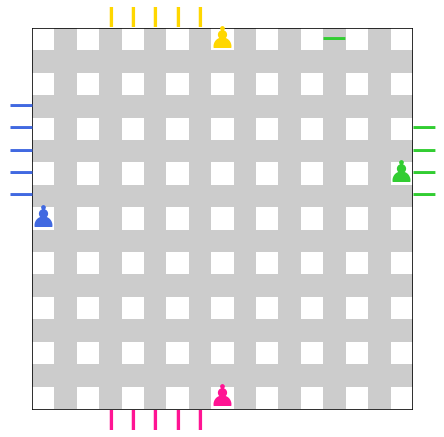

horizontal connection
Player 2 has: 3 walls left


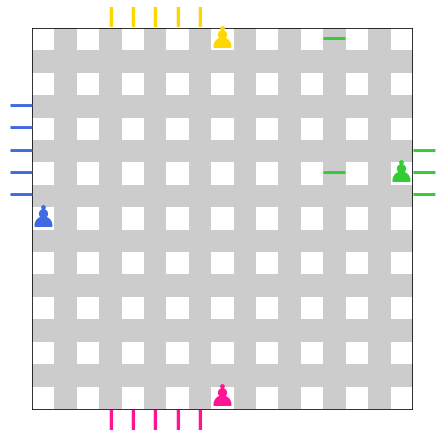

Player:  2 moved using the path


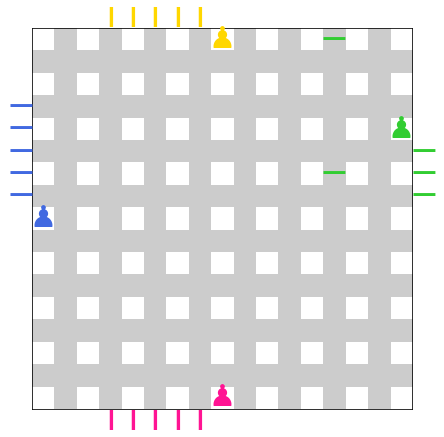

Player:  2 moved using the path


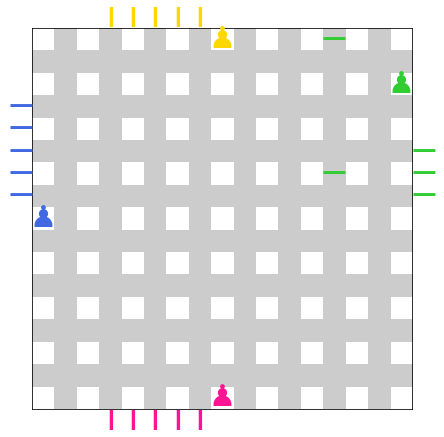

Player:  2 moved using the path


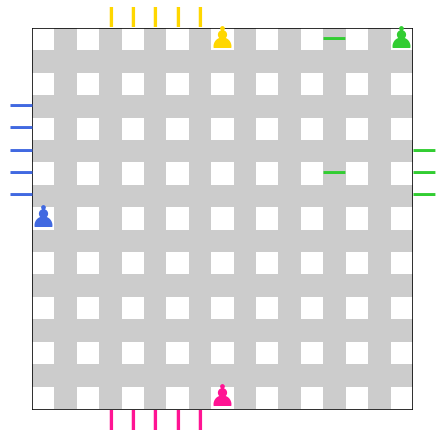

Player:  2 moved using the path


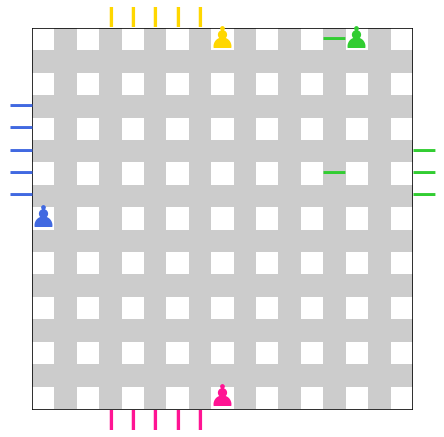

Player:  2 moved using the path


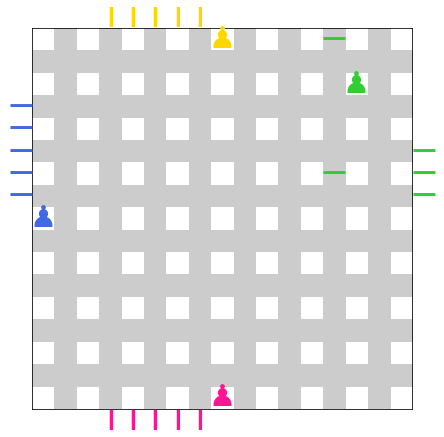

Player:  2 moved using the path


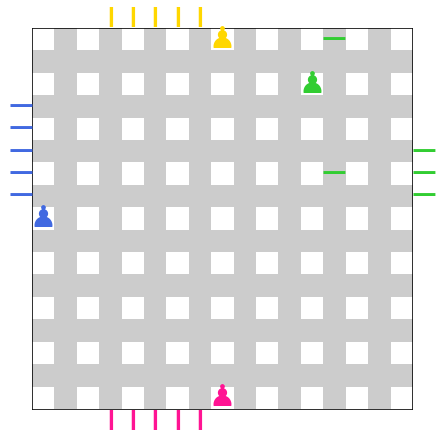

False

In [10]:
#note: Quoridor can only be played by either 2 or 4 players
#It is imposible to play with 3 players due to the amount of walls
#20 is the amount of walls that should be divided into the number of players
#Ergo, it can only be played by a divisble by 10 number of players (2 or 4)

nop = 4 #number of players

g = Game(nop)
g.drawQuoridorBoard()
path = dfspath.findPathDFS(adj, p.players[1])
print("The player", p.players[1].id, "Should take the path:", path)

p.players[1].move_from_path(path)
g.game()
adj = p.players[1].place_wall(13, 0, adj)
path = dfspath.findPathDFS(adj, p.players[1])
g.game()
adj = p.players[1].place_wall(13, 6, adj)
path = dfspath.findPathDFS(adj, p.players[1])
g.game()
p.players[1].move_from_path(path)
g.game()
p.players[1].move_from_path(path)
g.game()
p.players[1].move_from_path(path)
g.game()
p.players[1].move_from_path(path)
g.game()
p.players[1].move_from_path(path)
g.game()
p.players[1].move_from_path(path)
g.game()

